# Centering and Scaling¶ 

1. Numeric variables are often on different scales and cover different ranges, so they can't be easily compared.
   
2. What's more, variables with large values can dominate those with smaller values when using certain modeling techniques.

3. Centering and scaling is a common preprocessing task that puts numeric variables on a common scale so no single variable will dominate the others.

4. The simplest way to center data is to subtract the mean value from each data point.

5. Subtracting the mean centers the data around zero and sets the new mean to zero.

6. Let's try zero-centering the mtcars dataset, a small set of car-related data.  

In [1]:
import numpy as np 
import pandas as pd 
import os 
from sklearn import preprocessing



%matplotlib inline  

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
os.chdir('/kaggle/')

In [4]:
os.getcwd()

'/kaggle'

In [5]:
os.listdir('/kaggle/')

['src', 'lib', 'input', 'nbdev', 'working']

In [6]:
os.listdir('/kaggle/input/')

['mtcars']

In [7]:
os.listdir('input/mtcars')  


['mtcars.csv']

In [8]:
mtcars = pd.read_csv("/kaggle/input/mtcars/mtcars.csv")   

In [9]:
print(mtcars.head()) 

               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [10]:
# Set row index to car model: 

mtcars.index = mtcars.model  


# Drop car name column: 


del mtcars["model"]  
 

In [11]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
# Calculate column means: 

col_mean = mtcars.sum() / mtcars.shape[0] 
col_mean

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

Conclusion: 

1. With the column means in hand, we just need to subtract the column means from each row in an element-wise fashion to zero center the data.
   
2. Pandas performs math operations involving DataFrames and columns on an element-wise row-by-row basis by default.

3. So we can simply subtract our column means series from the data set to center it: 


In [13]:
centered = mtcars - col_mean 
centered.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,32.000000,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.0000
mean,-3.108624e-15,0.000000,2.131628e-14,0.000000,-1.526557e-16,-4.440892e-16,-2.609024e-15,0.000000,0.000000,0.000000,0.0000
std,6.026948e+00,1.785922,1.239387e+02,68.562868,5.346787e-01,9.784574e-01,1.786943e+00,0.504016,0.498991,0.737804,1.6152
min,-9.690625e+00,-2.187500,-1.596219e+02,-94.687500,-8.365625e-01,-1.704250e+00,-3.348750e+00,-0.437500,-0.406250,-0.687500,-1.8125
25%,-4.665625e+00,-2.187500,-1.098969e+02,-50.187500,-5.165625e-01,-6.360000e-01,-9.562500e-01,-0.437500,-0.406250,-0.687500,-0.8125
50%,-8.906250e-01,-0.187500,-3.442187e+01,-23.687500,9.843750e-02,1.077500e-01,-1.387500e-01,-0.437500,-0.406250,0.312500,-0.8125
75%,2.709375e+00,1.812500,9.527813e+01,33.312500,3.234375e-01,3.927500e-01,1.051250e+00,0.562500,0.593750,0.312500,1.1875
max,1.380937e+01,1.812500,2.412781e+02,188.312500,1.333437e+00,2.206750e+00,5.051250e+00,0.562500,0.593750,1.312500,5.1875


1. put it all on a common scale.
   
2. One way to put data on a common scale is to divide by the standard deviation.

3. Standard deviation is a statistic that describes the spread of numeric data.

4. The higher the standard deviation, the further the data points tend to be spread away from the mean value.

5. You can get standard deviations with df.std() 

In [14]:
column_deviation = mtcars.std(axis = 0) 

centered_and_scaled = centered / column_deviation 

centered_and_scaled.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,-5.551115e-16,-2.775558e-17,1.110223e-16,2.775558e-17,-2.775558e-16,-3.608225e-16,-1.443290e-15,0.000000,5.551115e-17,-2.775558e-17,2.775558e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.607883e+00,-1.224858e+00,-1.287910e+00,-1.381032e+00,-1.564608e+00,-1.741772e+00,-1.874010e+00,-0.868028,-8.141431e-01,-9.318192e-01,-1.122152e+00
25%,-7.741273e-01,-1.224858e+00,-8.867035e-01,-7.319924e-01,-9.661175e-01,-6.500027e-01,-5.351317e-01,-0.868028,-8.141431e-01,-9.318192e-01,-5.030337e-01
50%,-1.477738e-01,-1.049878e-01,-2.777331e-01,-3.454858e-01,1.841059e-01,1.101223e-01,-7.764656e-02,-0.868028,-8.141431e-01,4.235542e-01,-5.030337e-01
75%,4.495434e-01,1.014882e+00,7.687521e-01,4.858679e-01,6.049193e-01,4.013971e-01,5.882951e-01,1.116036,1.189901e+00,4.235542e-01,7.352031e-01
max,2.291272e+00,1.014882e+00,1.946754e+00,2.746567e+00,2.493904e+00,2.255336e+00,2.826755e+00,1.116036,1.189901e+00,1.778928e+00,3.211677e+00


1. After dividing by the standard deviation, every variable now has a standard deviation of 1.
   
2. At this point, all the columns have roughly the same mean and scale of spread about the mean.  

3. Manually centering and scaling as we've done is a good exercise, but it is often possible to perform common data preprocessing automatically using functions built into Python libraries.

4. The Python library scikit-learn, a popular package for predictive modeling and data analysis, has preprocessing tools including a scale() function for centering and scaling data:

In [15]:
from sklearn import preprocessing

In [16]:
# Scale the data: 

scaled_data = preprocessing.scale(mtcars) 

# Remake the DataFrame 
scaled_data = pd.DataFrame(scaled_data) 
scaled_data.describe() 
 


,0,1,2,3,4,5,6,7,8,9,10
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17,1.665335e-16,0.000000,-3.053113e-16,-4.718448e-16,-1.471046e-15,0.000000,0.000000,-2.775558e-17,-2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001,1.016001e+00,1.016001e+00
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130,-1.589643e+00,-1.769642e+00,-1.903996e+00,-0.881917,-0.827170,-9.467293e-01,-1.140108e+00
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-0.743705,-9.815764e-01,-6.604034e-01,-5.436944e-01,-0.881917,-0.827170,-9.467293e-01,-5.110827e-01
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-0.351014,1.870518e-01,1.118844e-01,-7.888899e-02,-0.881917,-0.827170,4.303315e-01,-5.110827e-01
75%,4.567366e-01,1.031121e+00,7.810529e-01,0.493642,6.145986e-01,4.078199e-01,5.977084e-01,1.133893,1.208941,4.303315e-01,7.469671e-01
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515,2.533809e+00,2.291423e+00,2.871986e+00,1.133893,1.208941,1.807392e+00,3.263067e+00


Note: 

1. preprocessing.scale() returns arrays so we convert it back into a DataFrame.

2. the values are almost the same as those we calculated manually but not exactly the same. These small differences are likely due to rounding and details of the scikit-learn implementation of centering and scaling.

# Dealing With Skewed Data¶ 

1. The distribution of data--its overall shape and how it is spread out--can have a significant impact on analysis and modeling.
   
2. Data that is roughly evenly spread around the mean value--known as normally distributed data--tends to be well-behaved.

3. On the other hand, some data sets exhibit significant skewness or asymmetry. To illustrate, let's generate a few distributions



array([[<Axes: title={'center': '0'}>]], dtype=object)

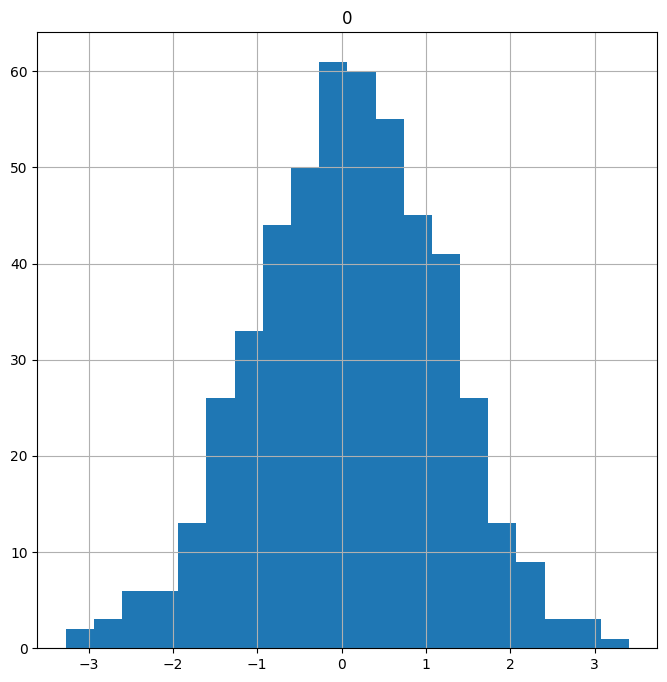

In [17]:
# 1. Generate normal data
# 2. Convert to DF 
# 3. Plot histogram 

nor_dis = np.random.normal(size = 500) 

nor_dis = pd.DataFrame(nor_dis) 

nor_dis.hist(figsize = (8, 8),
             bins = 20)  


# The normally distributed data looks roughly symmetric with a bell-shaped curve. 


array([[<Axes: title={'center': '0'}>]], dtype=object)

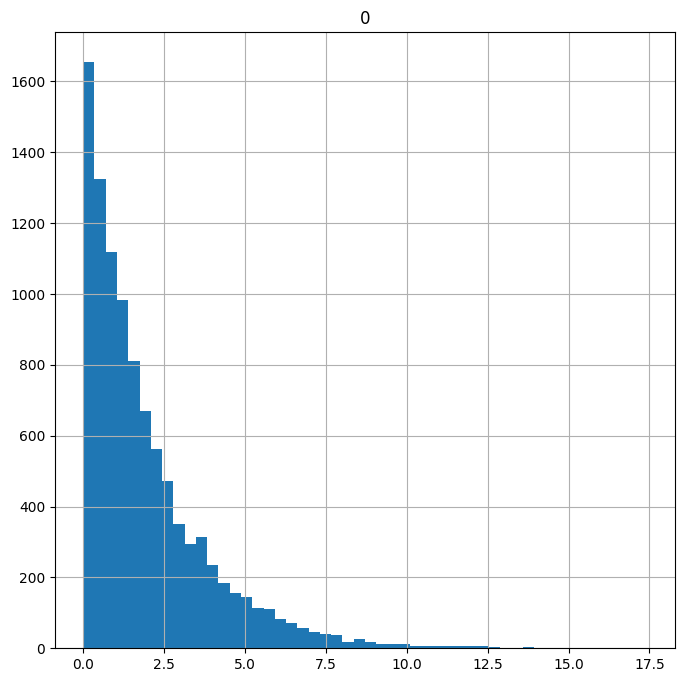

In [18]:
# 1. Generate some skewed data
# 2. Convert to df 
# 3. plot histogram 

skewed_data = np.random.exponential(scale = 2,
                                   size = 10000) 

skewed_data = pd.DataFrame(skewed_data) 

skewed_data.hist(figsize = (8, 8),
                 bins =50)  
 


1. Data with a long tail that goes off to the right is called positively skewed or right skewed.
   
2. When you have a skewed distribution like the one above, the extreme values in the long tail can have a disproportionately large influence on whatever test you perform or models you build.

3. Reducing skew may improve your results.

4. Taking the square root of each data point or taking the natural logarithm of each data point are two simple transformations that can reduce skew.

5. Let's see their effects on the skewed data. 



array([[<Axes: title={'center': '0'}>]], dtype=object)

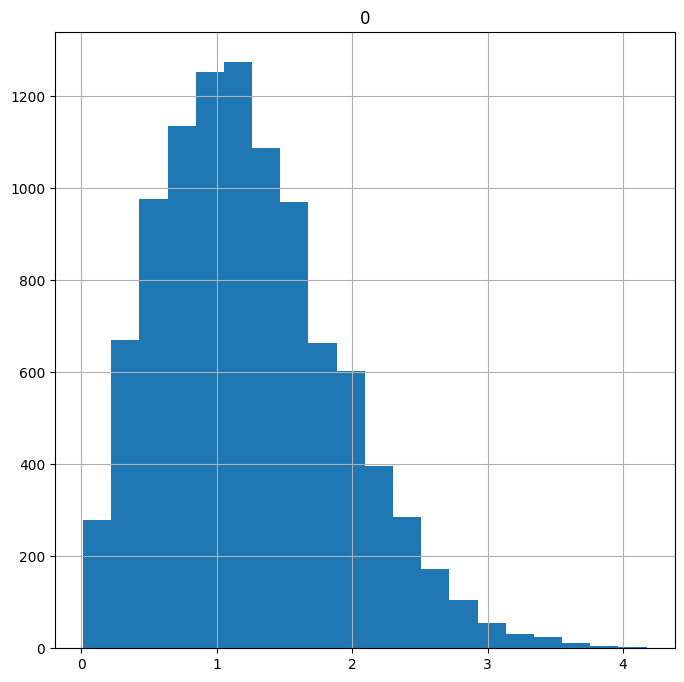

In [19]:
#  Get the square root of data points: 

skewed_transformed = skewed_data.apply(np.sqrt) 

skewed_transformed.hist(figsize = (8, 8),
                       bins = 20) 



Note: The df.apply() function applies a given function to each row or column of the DataFrame. In this case we pass in np.sqrt to get the square root of each value.